In [57]:
import os
import shutil
import random
from PIL import Image
import matplotlib.pyplot as plt

# 원본 데이터 폴더 (수정 가능)
source_root = "/home/user/ANN/091.차량_외관_영상_데이터/01.데이터/1.Training/원천데이터"

# 정리된 학습용 이미지가 저장될 폴더
output_root = "./datasets/processed_train"
os.makedirs(output_root, exist_ok=True)

# 샘플링 목표 수
target_count = 2000


In [58]:
class_folders = sorted([
    f for f in os.listdir(source_root)
    if os.path.isdir(os.path.join(source_root, f))
       and not f.startswith('.')  # 숨김 폴더 제외
       and not f.startswith('091')  # 중첩 폴더 제외
       and f != 'datasets'  # 결과 폴더 제외
])

print("실제 클래스 수:", len(class_folders))
print("클래스 예시:", class_folders[:5])


실제 클래스 수: 15
클래스 예시: ['028_K7', '056_봉고3', '065_쏘렌토', 'AU_아우디', 'BE_벤츠_A-Class']


In [59]:
for class_folder in class_folders:
    class_path = os.path.join(source_root, class_folder)
    
    # 하위 폴더 포함 이미지 경로 수집
    image_paths = []
    for root, _, files in os.walk(class_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(root, file))

    print(f"[{class_folder}] 이미지 수: {len(image_paths)}")

    # 샘플링 또는 그대로 사용
    if len(image_paths) >= target_count:
        sampled_images = random.sample(image_paths, target_count)
    else:
        print(f"⚠️ {class_folder} - 부족 ({len(image_paths)}장), 증강 필요 예정")
        sampled_images = image_paths  # 일단 전부 복사

    # 저장할 폴더 만들기
    output_class_path = os.path.join(output_root, class_folder)
    os.makedirs(output_class_path, exist_ok=True)

    # 이미지 복사
    for i, src_path in enumerate(sampled_images):
        ext = os.path.splitext(src_path)[1]
        dst_filename = f"{class_folder}_{i:04d}{ext}"
        dst_path = os.path.join(output_class_path, dst_filename)
        shutil.copy(src_path, dst_path)


[028_K7] 이미지 수: 7465
[056_봉고3] 이미지 수: 2498
[065_쏘렌토] 이미지 수: 7575
[AU_아우디] 이미지 수: 3475
[BE_벤츠_A-Class] 이미지 수: 417
⚠️ BE_벤츠_A-Class - 부족 (417장), 증강 필요 예정
[BE_벤츠_C-Class] 이미지 수: 2025
[RE_르노] 이미지 수: 1085
⚠️ RE_르노 - 부족 (1085장), 증강 필요 예정
[RS_르노삼성] 이미지 수: 16254
[SS_쌍용] 이미지 수: 16285
[TO_토요타] 이미지 수: 831
⚠️ TO_토요타 - 부족 (831장), 증강 필요 예정
[VO_폭스바겐] 이미지 수: 2903
[VV_볼보] 이미지 수: 922
⚠️ VV_볼보 - 부족 (922장), 증강 필요 예정
[쏘나타] 이미지 수: 7391
[아반떼] 이미지 수: 7549
[투싼] 이미지 수: 4708


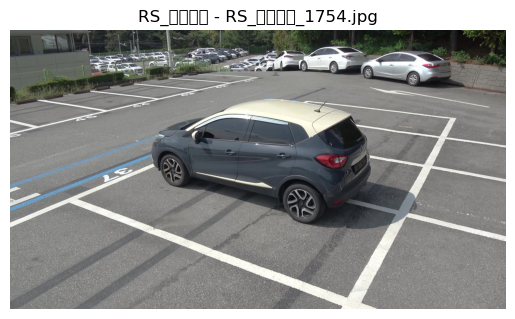

In [60]:
# 확인용 이미지 보여주기
sample_class = random.choice(class_folders)
sample_dir = os.path.join(output_root, sample_class)
sample_img = random.choice(os.listdir(sample_dir))

img = Image.open(os.path.join(sample_dir, sample_img))
plt.imshow(img)
plt.axis('off')
plt.title(f"{sample_class} - {sample_img}")
plt.show()


In [65]:
from PIL import ImageEnhance, ImageOps

def augment_image(image):
    choice = random.choice(['rotate', 'flip', 'brightness', 'contrast', 'zoom'])

    if choice == 'rotate':
        return image.rotate(random.choice([-45, -30, 30, 45]))
    elif choice == 'flip':
        return ImageOps.mirror(image)
    elif choice == 'brightness':
        enhancer = ImageEnhance.Brightness(image)
        return enhancer.enhance(random.uniform(0.4, 1.8))
    elif choice == 'contrast':
        enhancer = ImageEnhance.Contrast(image)
        return enhancer.enhance(random.uniform(0.3, 2.0))
    elif choice == 'zoom':
        w, h = image.size
        crop_box = (int(w * 0.1), int(h * 0.1), int(w * 0.9), int(h * 0.9))
        return image.crop(crop_box).resize((w, h))
    return image


In [66]:
from tqdm import tqdm
import os
import random
from PIL import Image

# 증강 대상 클래스와 수량
augmentation_targets = {
    "RE_르노": 915,
    "TO_토요타": 1169,
    "VV_볼보": 1078
}

for class_folder, augment_count in augmentation_targets.items():
    source_dir = os.path.join(source_root, class_folder)
    target_dir = os.path.join(output_root, class_folder)
    os.makedirs(target_dir, exist_ok=True)

    # 원본 이미지 목록
    original_images = []
    for root, _, files in os.walk(source_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                original_images.append(os.path.join(root, file))

    print(f"→ {class_folder} 증강 시작")

    for i in tqdm(range(augment_count)):
        src_path = random.choice(original_images)
        ext = os.path.splitext(src_path)[1]
        img = Image.open(src_path).convert("RGB")

        aug_img = augment_image(img)
        dst_name = f"{class_folder}_aug_{i:04d}{ext}"
        dst_path = os.path.join(target_dir, dst_name)
        aug_img.save(dst_path)


→ RE_르노 증강 시작


100%|█████████████████████████████████████████████████████████████████████████████████████████| 915/915 [00:39<00:00, 23.32it/s]


→ TO_토요타 증강 시작


100%|███████████████████████████████████████████████████████████████████████████████████████| 1169/1169 [00:45<00:00, 25.75it/s]


→ VV_볼보 증강 시작


100%|███████████████████████████████████████████████████████████████████████████████████████| 1078/1078 [00:43<00:00, 24.82it/s]


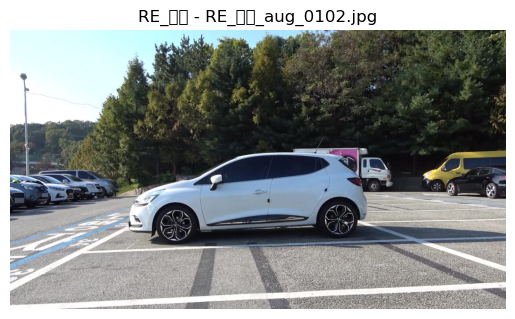

In [78]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 클래스 이름 설정
class_name = "RE_르노"
folder_path = f"./datasets/processed_train/{class_name}"

# 증강 이미지 파일 목록
augmented_files = [f for f in os.listdir(folder_path) if "_aug_" in f]

# 에러 처리
if not augmented_files:
    print("⚠️ 증강된 이미지가 없습니다.")
else:
    # 랜덤으로 하나 선택
    img_file = random.choice(augmented_files)
    img_path = os.path.join(folder_path, img_file)

    # 이미지 열기 및 시각화
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"{class_name} - {img_file}")
    plt.axis("off")
    plt.show()
